# MUST RUN AT THE START OF EVERYTHING

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from snorkel import SnorkelSession
session = SnorkelSession()

# Load preprocessed data 

In [2]:
from snorkel.models import candidate_subclass

DiseaseGene = candidate_subclass('DiseaseGene', ['Disease', 'Gene'])

In [5]:
from snorkel.annotations import LabelAnnotator
labeler = LabelAnnotator(f=None)

L_train = labeler.load_matrix(session,split=0)
L_dev = labeler.load_matrix(session,split=1)

# Run the machine learning models below

# Naive Bayes

In [6]:
#Train the model
from snorkel.learning import NaiveBayes

gen_model = NaiveBayes()
gen_model.train(L_train)
train_marginals = gen_model.marginals(L_train)

/home/davidnicholson/anaconda3/envs/snorkeling/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Training marginals (!= 0.5):	1431
Features:			3
Begin training for rate=0.01, mu=1e-06
	Learning epoch = 0	Gradient mag. = 0.065147
	Learning epoch = 250	Gradient mag. = 0.057515
	Learning epoch = 500	Gradient mag. = 0.049217
	Learning epoch = 750	Gradient mag. = 0.042915
Final gradient magnitude for rate=0.01, mu=1e-06: 0.038


In [8]:
train_marginals = gen_model.marginals(L_train)

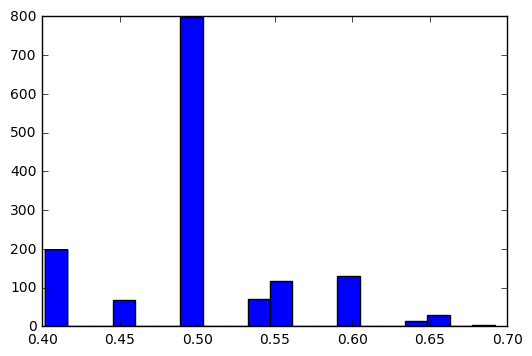

In [9]:
import matplotlib.pyplot as plt
plt.hist(train_marginals,bins=20)
plt.show()

# Generative Model

In [7]:
from snorkel.learning import GenerativeModel

gen_model = GenerativeModel()
gen_model.train(L_train, epochs=500, decay=0.95, step_size=0.1/L_train.shape[0], reg_param=1e-6)

In [8]:
train_marginals = gen_model.marginals(L_train)

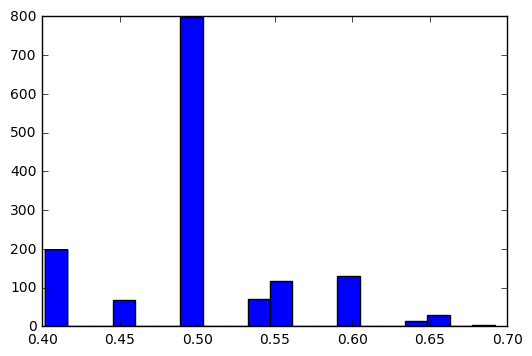

In [9]:
import matplotlib.pyplot as plt
plt.hist(train_marginals,bins=20)
plt.show()

In [21]:
gen_model.weights.lf_accuracy()

array([ 0.5215845 ,  0.52546855,  0.55153373])

# Ignore Below until Gold Candidate Received

In [31]:
L_train.get_candidate(session,21).labels

[Label (LF_mutation = 1)]

In [ ]:
from snorkel.viewer import SentenceNgramViewer

sv = SentenceNgramViewer(tp, session)

In [ ]:
sv